In [1]:
# (1) Importing the Libraries;

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# (2) Importing DataSet;

data = pd.read_csv("Heart_Disease.csv")

In [3]:
# (3) Shape of Initial Dataset (Row, Column);

data.shape

(1025, 14)

In [4]:
# (4) Heads of Table;

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# (5) Count the empty (NaN, NAN, na) values in each column;

data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# (6) Look at the Data Types;

data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# (7) Info about Data;

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: title={'center': 'Patients of Heart Disease'}>

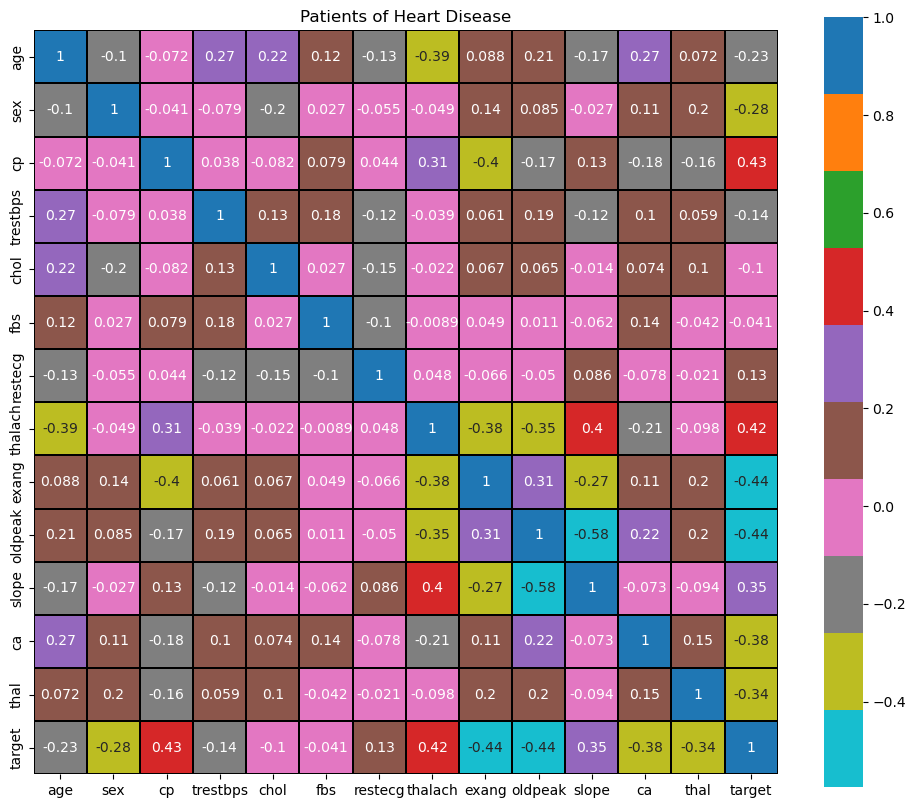

In [9]:
# (8) Set up the matplotlib figure & Draw the Heatmap using seaborn;

plt.figure(figsize=(12,10))
plt.title('Patients of Heart Disease')

sns.heatmap(data.astype(float).corr(),linewidths=0.25,vmax=1.0,square=True,
           cmap="tab10_r", linecolor='black',annot=True)

In [10]:
# (9) Iloc Funstions;

x = data.iloc[:,0:14].values
y = data.iloc[:, 13].values

In [11]:
# (10) Spliting the DataSet into Training Set & Test Set;

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [12]:
# (11) Logistic Regression;

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0)

LR.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [13]:
# (12) KNeighbors Classifier;

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5)

KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
# (13) SVM (Support Vector Mechanism);

from sklearn.svm import SVC

SVM_L = SVC(kernel='linear', random_state = 0)

SVM_L.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [15]:
# (14) Naive Bayes Algorithm using GaussianNB;

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [16]:
# (15) Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier(random_state = 0)
DTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
# (16) Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state = 0)
RFC.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [18]:
# (17) Data Prediction;

y_pred_1 = LR.predict(x_test)

y_pred_2 = KNN.predict(x_test)

y_pred_3 = SVM_L.predict(x_test)

y_pred_4 = NB.predict(x_test)

y_pred_5 = DTree.predict(x_test)

y_pred_6 = RFC.predict(x_test)

In [19]:
# (18) Accuracy and Confusion Matrix;

ACY1 = accuracy_score(y_test, y_pred_1)
print("Accuracy for Logistic Regression =>",100*ACY1,"%")
CFM1 = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix for Logistic Regression =>")
print(CFM1)

print("--------------------------------------------------")


ACY2 = accuracy_score(y_test, y_pred_2)
print("Accuracy for KNeighbors Classifier =>",100*ACY2,"%")
CFM2 = confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix for KNeighbors Classifier =>")
print(CFM2)

print("--------------------------------------------------")


ACY3 = accuracy_score(y_test, y_pred_3)
print("Accuracy for SVM =>",100*ACY3,"%")

CFM3 = confusion_matrix(y_test, y_pred_3)
print("Confusion Matrix for SVM =>")

print(CFM3)

print("--------------------------------------------------")

ACY4 = accuracy_score(y_test, y_pred_4)
print("Accuracy for Naive Bayes Algorithm =>",100*ACY4,"%")

CFM4 = confusion_matrix(y_test, y_pred_4)
print("Confusion Matrix for Naive Bayes Algorithm =>")

print(CFM4)

print("--------------------------------------------------")

ACY5 = accuracy_score(y_test, y_pred_5)
print("Accuracy for Dicision Tree Classifier =>",100*ACY5,"%")

CFM5 = confusion_matrix(y_test, y_pred_5)
print("Confusion Matrix Dicision Tree Classifier =>")

print(CFM5)

print("--------------------------------------------------")

ACY6 = accuracy_score(y_test, y_pred_6)
print("Accuracy for Random Forest Classifier =>",100*ACY6,"%")

CFM6 = confusion_matrix(y_test, y_pred_6)
print("Confusion Random Forest Classifier =>")

print(CFM6)

print("--------------------------------------------------")

Accuracy for Logistic Regression => 100.0 %
Confusion Matrix for Logistic Regression =>
[[145   0]
 [  0 163]]
--------------------------------------------------
Accuracy for KNeighbors Classifier => 74.35064935064936 %
Confusion Matrix for KNeighbors Classifier =>
[[114  31]
 [ 48 115]]
--------------------------------------------------
Accuracy for SVM => 100.0 %
Confusion Matrix for SVM =>
[[145   0]
 [  0 163]]
--------------------------------------------------
Accuracy for Naive Bayes Algorithm => 100.0 %
Confusion Matrix for Naive Bayes Algorithm =>
[[145   0]
 [  0 163]]
--------------------------------------------------
Accuracy for Dicision Tree Classifier => 100.0 %
Confusion Matrix Dicision Tree Classifier =>
[[145   0]
 [  0 163]]
--------------------------------------------------
Accuracy for Random Forest Classifier => 100.0 %
Confusion Random Forest Classifier =>
[[145   0]
 [  0 163]]
--------------------------------------------------


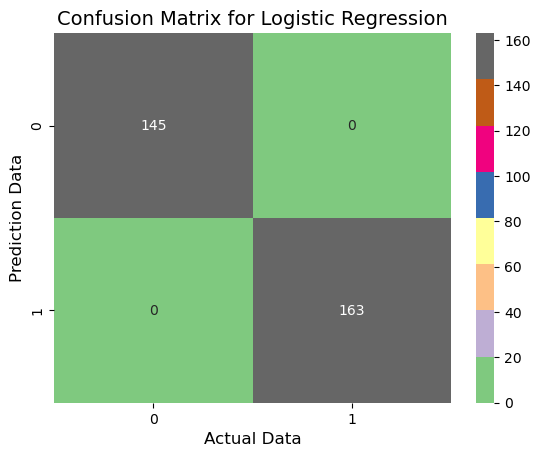

-------------------------------------------------------------------


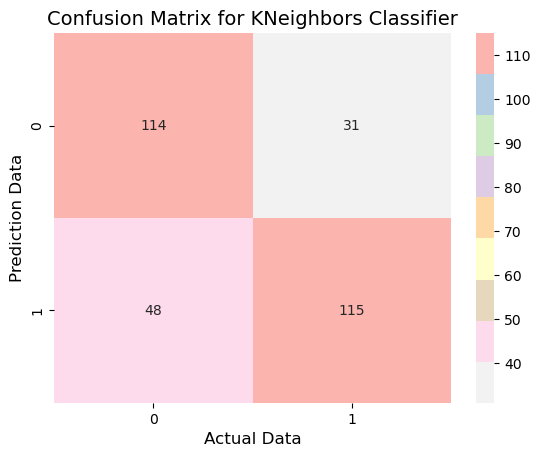

-------------------------------------------------------------------


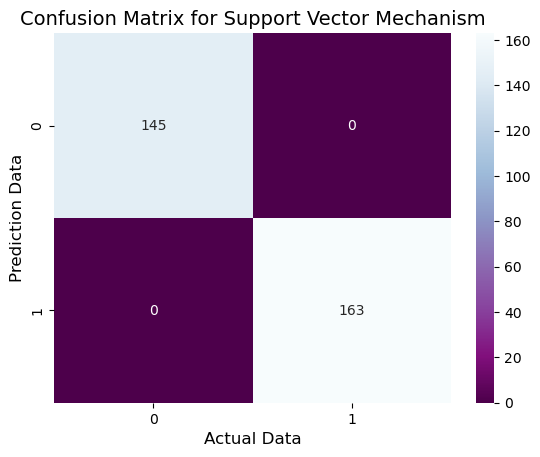

-------------------------------------------------------------------


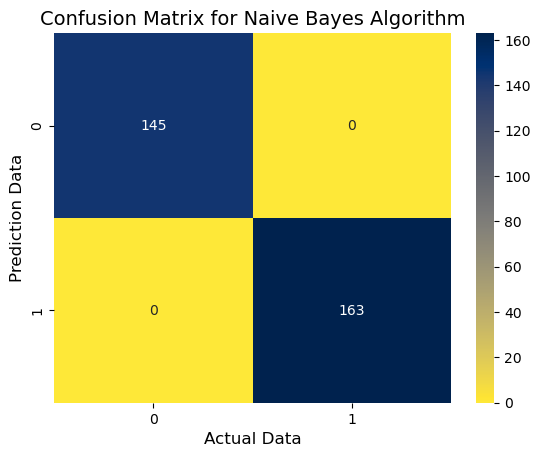

-------------------------------------------------------------------


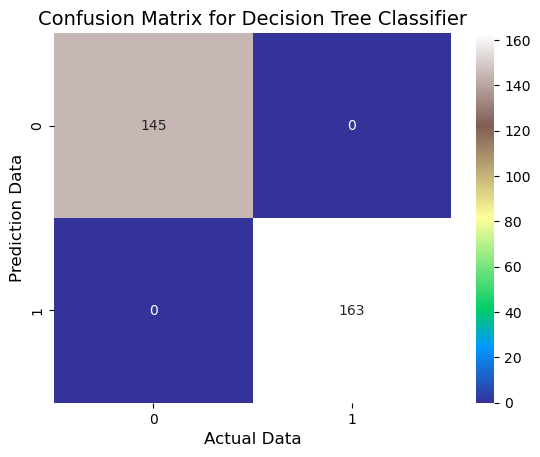

-------------------------------------------------------------------


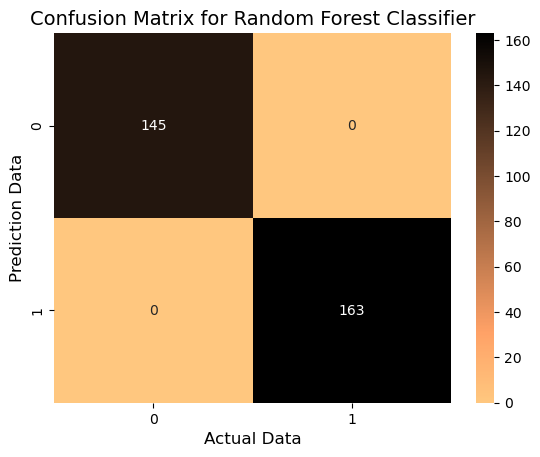

-------------------------------------------------------------------


In [20]:
# (19) Visualization of All Confusion Matrices;

sns.heatmap(CFM1, annot=True, fmt='g', cmap='Accent')
plt.ylabel('Prediction Data',fontsize=12)
plt.xlabel('Actual Data',fontsize=12)
plt.title('Confusion Matrix for Logistic Regression',fontsize=14)
plt.show()
print("-------------------------------------------------------------------")

sns.heatmap(CFM2, annot=True, fmt='g', cmap='Pastel1_r')
plt.ylabel('Prediction Data',fontsize=12)
plt.xlabel('Actual Data',fontsize=12)
plt.title('Confusion Matrix for KNeighbors Classifier',fontsize=14)
plt.show()
print("-------------------------------------------------------------------")

sns.heatmap(CFM3, annot=True, fmt='g', cmap='BuPu_r')
plt.ylabel('Prediction Data',fontsize=12)
plt.xlabel('Actual Data',fontsize=12)
plt.title('Confusion Matrix for Support Vector Mechanism',fontsize=14)
plt.show()
print("-------------------------------------------------------------------")

sns.heatmap(CFM4, annot=True, fmt='g', cmap='cividis_r')
plt.ylabel('Prediction Data',fontsize=12)
plt.xlabel('Actual Data',fontsize=12)
plt.title('Confusion Matrix for Naive Bayes Algorithm',fontsize=14)
plt.show()
print("-------------------------------------------------------------------")

sns.heatmap(CFM5, annot=True, fmt='g', cmap='terrain')
plt.ylabel('Prediction Data',fontsize=12)
plt.xlabel('Actual Data',fontsize=12)
plt.title('Confusion Matrix for Decision Tree Classifier',fontsize=14)
plt.show()
print("-------------------------------------------------------------------")

sns.heatmap(CFM6, annot=True, fmt='g', cmap='copper_r')
plt.ylabel('Prediction Data',fontsize=12)
plt.xlabel('Actual Data',fontsize=12)
plt.title('Confusion Matrix for Random Forest Classifier',fontsize=14)
plt.show()
print("-------------------------------------------------------------------")

<Axes: xlabel='target', ylabel='count'>

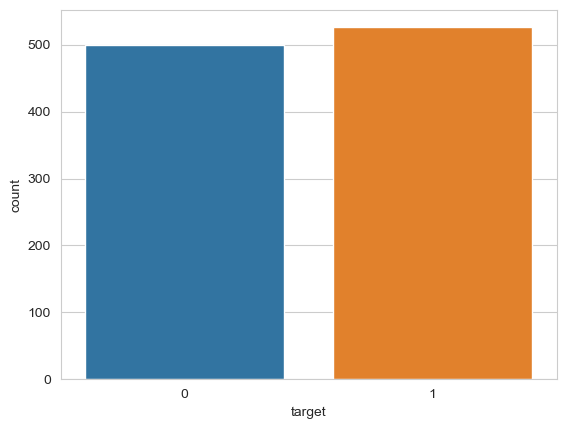

In [21]:
# (21)

sns.set_style('whitegrid')
sns.countplot(x = 'target', data = data)

In [22]:
# (22) All Accuracies;

P1 = 100*ACY1
P2 = 100*ACY2
P3 = 100*ACY3
P4 = 100*ACY4
P5 = 100*ACY5
P6 = 100*ACY6

scores= (P1,P2,P3,P4,P5,P6)

algorithms = ["Logistic Regression","KNeighbors Classifier",
              "Support Vector Mechanism","Naive Bayes Algorithm",
             "Decision Tree Classifier", "Random Forest Classifier"]

for i in range(len(algorithms)):
    print("The Accuracy Score achieved using"+algorithms[i]+" is=> "
          +str(scores[i])+" % ")

The Accuracy Score achieved usingLogistic Regression is=> 100.0 % 
The Accuracy Score achieved usingKNeighbors Classifier is=> 74.35064935064936 % 
The Accuracy Score achieved usingSupport Vector Mechanism is=> 100.0 % 
The Accuracy Score achieved usingNaive Bayes Algorithm is=> 100.0 % 
The Accuracy Score achieved usingDecision Tree Classifier is=> 100.0 % 
The Accuracy Score achieved usingRandom Forest Classifier is=> 100.0 % 


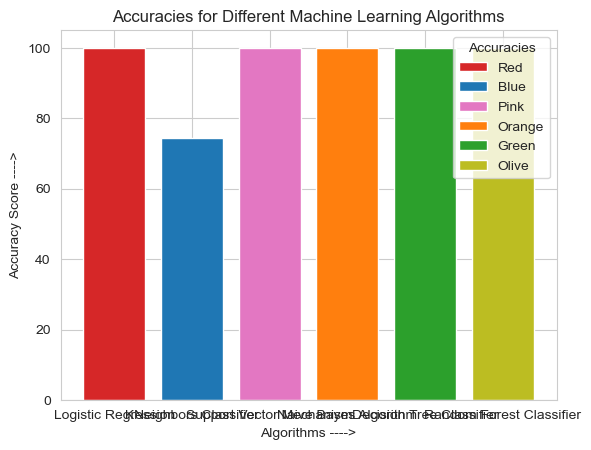

In [23]:
# (23) Visualizations of All Accuracies:

fig, ax = plt.subplots()

bar_labels = ['Red', 'Blue', 'Pink', 'Orange', 'Green', 'Olive']

bar_colors = ['tab:red','tab:blue','tab:pink','tab:orange','tab:green',
              'tab:olive']

ax.bar(algorithms, scores, label=bar_labels, color=bar_colors)

ax.set_xlabel('Algorithms ---->')

ax.set_ylabel('Accuracy Score ---->')

ax.set_title('Accuracies for Different Machine Learning Algorithms')

ax.legend(title='Accuracies')

plt.show()